# Intializing Board

In [ ]:
import numpy as np


board1_easy = [[8, 0, 0, 5, 1, 0, 0, 0, 2],
               [0, 0, 6, 9, 8, 0, 4, 5, 0],
               [0, 0, 0, 0, 0, 6, 0, 0, 0],
               [3, 5, 0, 7, 0, 0, 6, 1, 0],
               [0, 0, 9, 6, 2, 5, 7, 0, 0],
               [0, 7, 4, 0, 0, 3, 0, 8, 5],
               [0, 0, 0, 3, 0, 0, 0, 0, 0],
               [0, 2, 3, 0, 7, 9, 1, 0, 0],
               [7, 0, 0, 0, 5, 2, 0, 0, 3]]

np.save('1_Easy', np.array(board1_easy))
#print(np.array(board1_easy))


board2_medium = [[7, 2, 1, 0, 8, 0, 0, 6, 0],
		[0, 0, 0, 7, 0, 0, 8, 0, 0],
		[0, 0, 0, 1, 0, 0, 0, 9, 5],
		[0, 0, 8, 3, 0, 6, 0, 0, 9],
		[0, 0, 0, 0, 0, 0, 0, 0, 0],
		[9, 0, 0, 2, 0, 5, 1, 0, 0],
		[6, 9, 0, 0, 0, 1, 0, 0, 0],
		[0, 0, 5, 0, 0, 2, 0, 0, 0],
		[0, 1, 0, 0, 7, 0, 6, 5, 3]]

np.save('2_Medium', np.array(board2_medium))

board3_hard = [[0, 0, 0, 0, 1, 0, 0, 9, 0],
		[0, 0, 0, 0, 0, 2, 7, 0, 0],
		[6, 3, 1, 5, 0, 0, 4, 2, 0],
		[0, 0, 4, 0, 0, 0, 2, 0, 7],
		[0, 0, 0, 0, 4, 0, 0, 0, 0],
		[3, 0, 5, 0, 0, 0, 6, 0, 0],
		[0, 8, 7, 0, 0, 4, 9, 3, 1],
		[0, 0, 6, 9, 0, 0, 0, 0, 0],
		[0, 5, 0, 0, 7, 0, 0, 0, 0]]

np.save('3_Hard', np.array(board3_hard))

board4_evil = [[4, 0, 0, 0, 0, 3, 0, 6, 0],
		[0, 0, 0, 9, 2, 0, 0, 0, 0],
		[0, 5, 0, 0, 0, 6, 0, 9, 8],
		[7, 0, 0, 0, 0, 5, 0, 0, 0],
		[8, 0, 1, 0, 0, 0, 3, 0, 4],
		[0, 0, 0, 6, 0, 0, 0, 0, 7],
		[2, 4, 0, 3, 0, 0, 0, 1, 0],
		[0, 0, 0, 0, 1, 4, 0, 0, 0],
		[0, 3, 0, 7, 0, 0, 0, 0, 9]]

np.save('4_Evil', np.array(board4_evil))

# serial recursive backtracking

In [ ]:
import numpy as np


class Sudoku():
    def __init__(self, board):
        self.board = board
        self.rows = range(9)
        self.columns = range(9)
        self.boxes = range(9)
        self.values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        self.backtracked = 0


    # Find unassigned blanks
    def find_blanks(self, count): # count keeps track of the current cell location
        for i in self.rows:
            for j in self.columns:
                if self.board[i][j] == 0:
                    count[0] = i
                    count[1] = j
                    return True
        return False

    # Returns domain after checking row constraints
    def check_rows_dom(self, row):
        values = self.values.copy()
        for i in self.columns:
            if self.board[row][i] in values:
                values.remove(self.board[row,i])
        return values

    # Returns domain after checking column constraints
    def check_columns_dom(self, column):
        values = self.values.copy()
        for i in self.rows:
            if self.board[i][column] in values:
                values.remove(self.board[i][column])
        return values

    # Returns domain after checking box constraints
    def check_boxes_dom(self, row, column):
        values = self.values.copy()
        for i in range(3):
            for j in range(3):
                if self.board[row+i][column+j] in values:
                    values.remove(self.board[row+i][column+j])
        return values


    # Find all the unassigned variables that meet the meets the constraints
    def find_constrained_dom(self, row, column):
        row_dom = self.check_rows_dom(row)
        col_dom = self.check_columns_dom(column)
        box_dom = self.check_boxes_dom(row-row%3, column-column%3)


        ordered_dom = set(row_dom).intersection(set(col_dom), set(box_dom))
        return list(ordered_dom)


    # What is backtracking doing?

        # It checks if a cell is blank, keeps the previous structure. Count is the starting cell
        # If blank:
            # Find possible values that could go in the cell (domain)
            # Update list of unassigned variables with the domain found (The idea is to reduce the search space)
            # For each value in domain, start searching.....
                # Do your usual backtracking stuff


    def backtracking(self, count):
        if not self.find_blanks(count):
            return True

        row = count[0]
        column = count[1]

        cell_dom = self.find_constrained_dom(row, column)

        for j in range(len(cell_dom)):
            self.board[row][column] = cell_dom[j]

            if self.backtracking(count):
                return True

            self.board[row][column] = 0

            if self.board[row][column] == 0:
                self.backtracked += 1

        return False




if __name__ == '__main__':


    board1 = np.load('1_Easy.npy')

    board2 = np.load('2_Medium.npy')

    board3 = np.load('3_Hard.npy')

    board4 = np.load('4_Evil.npy')

    board_name = {'Easy':board1, 'Medium':board2, 'Hard':board3, 'Evil':board4}

    board = ['Easy', 'Medium', 'Hard', 'Evil']


    for item in board:
        sudoku = Sudoku(board_name[item])

        # sudoku.update_unassigned()
        result = sudoku.backtracking([0, 0])


        if result == True:
            print(np.matrix(sudoku.board))
            print('Number of times backtracked: ', sudoku.backtracked)
        else:
            print('No solution')

[[8 9 7 5 1 4 3 6 2]
 [2 3 6 9 8 7 4 5 1]
 [4 1 5 2 3 6 9 7 8]
 [3 5 2 7 4 8 6 1 9]
 [1 8 9 6 2 5 7 3 4]
 [6 7 4 1 9 3 2 8 5]
 [9 4 8 3 6 1 5 2 7]
 [5 2 3 8 7 9 1 4 6]
 [7 6 1 4 5 2 8 9 3]]
Number of times backtracked:  121
[[7 2 1 5 8 9 3 6 4]
 [5 4 9 7 6 3 8 1 2]
 [3 8 6 1 2 4 7 9 5]
 [2 5 8 3 1 6 4 7 9]
 [1 3 4 8 9 7 5 2 6]
 [9 6 7 2 4 5 1 3 8]
 [6 9 3 4 5 1 2 8 7]
 [8 7 5 6 3 2 9 4 1]
 [4 1 2 9 7 8 6 5 3]]
Number of times backtracked:  17281
[[7 2 8 4 1 6 3 9 5]
 [5 4 9 8 3 2 7 1 6]
 [6 3 1 5 9 7 4 2 8]
 [1 9 4 3 6 5 2 8 7]
 [8 6 2 7 4 9 1 5 3]
 [3 7 5 1 2 8 6 4 9]
 [2 8 7 6 5 4 9 3 1]
 [4 1 6 9 8 3 5 7 2]
 [9 5 3 2 7 1 8 6 4]]
Number of times backtracked:  10364
[[4 7 9 8 5 3 1 6 2]
 [6 1 8 9 2 7 4 3 5]
 [3 5 2 1 4 6 7 9 8]
 [7 9 3 4 8 5 6 2 1]
 [8 6 1 2 7 9 3 5 4]
 [5 2 4 6 3 1 9 8 7]
 [2 4 7 3 9 8 5 1 6]
 [9 8 6 5 1 4 2 7 3]
 [1 3 5 7 6 2 8 4 9]]
Number of times backtracked:  8366


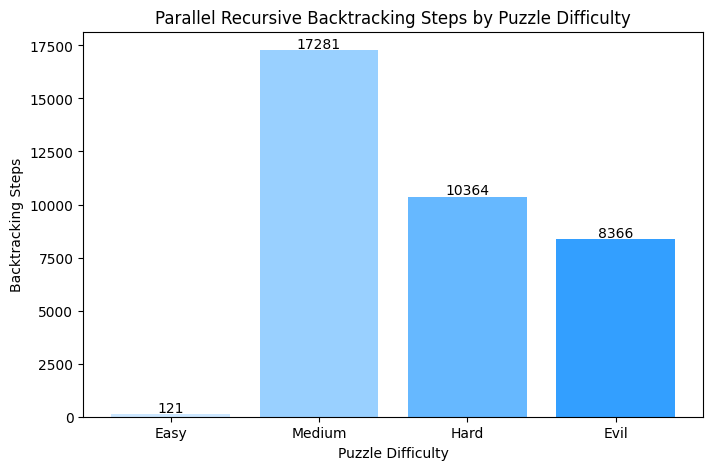

In [ ]:
import matplotlib.pyplot as plt

# Data for the chart
difficulties = ['Easy', 'Medium', 'Hard', 'Evil']
parallel_backtracking_steps = [121, 17281, 10364, 8366]

# Custom shades of blue
colors = ['#cce7ff', '#99d0ff', '#66b8ff', '#339fff']  # Lighter to darker blue gradient

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(difficulties, parallel_backtracking_steps, color=colors)
plt.xlabel('Puzzle Difficulty')
plt.ylabel('Backtracking Steps')
plt.title('Parallel Recursive Backtracking Steps by Puzzle Difficulty')

# Add exact values on top of the bars
for i, v in enumerate(parallel_backtracking_steps):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10, color='black')

# Display the chart
plt.show()

# PARALLEL RECURSIVE BACKTRACKING

In [ ]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor

class Sudoku():
    def __init__(self, board):
        self.board = board
        self.rows = range(9)
        self.columns = range(9)
        self.boxes = range(9)
        self.values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        self.backtracked = 0

    def find_blanks(self, count):
        for i in self.rows:
            for j in self.columns:
                if self.board[i][j] == 0:
                    count[0] = i
                    count[1] = j
                    return True
        return False

    def check_rows_dom(self, row):
        values = self.values.copy()
        for i in self.columns:
            if self.board[row][i] in values:
                values.remove(self.board[row, i])
        return values

    def check_columns_dom(self, column):
        values = self.values.copy()
        for i in self.rows:
            if self.board[i][column] in values:
                values.remove(self.board[i][column])
        return values

    def check_boxes_dom(self, row, column):
        values = self.values.copy()
        for i in range(3):
            for j in range(3):
                if self.board[row + i][column + j] in values:
                    values.remove(self.board[row + i][column + j])
        return values

    def find_constrained_dom(self, row, column):
        row_dom = self.check_rows_dom(row)
        col_dom = self.check_columns_dom(column)
        box_dom = self.check_boxes_dom(row - row % 3, column - column % 3)

        ordered_dom = set(row_dom).intersection(set(col_dom), set(box_dom))
        return list(ordered_dom)

    def backtracking(self, count):
        if not self.find_blanks(count):
            return True

        row = count[0]
        column = count[1]

        cell_dom = self.find_constrained_dom(row, column)

        for j in range(len(cell_dom)):
            self.board[row][column] = cell_dom[j]

            if self.backtracking(count):  # Recursive backtracking
                return True

            self.board[row][column] = 0

            if self.board[row][column] == 0:
                self.backtracked += 1

        return False

    def parallel_backtracking(self, initial_choices):
        """Solve the Sudoku puzzle by exploring different starting points in parallel."""
        solutions = []

        def solve_partial_board(start_value):
            temp_board = self.board.copy()
            temp_board[0][0] = start_value  # Assume first blank cell for parallelization
            temp_sudoku = Sudoku(temp_board)
            if temp_sudoku.backtracking([0, 0]):
                return temp_sudoku.board, temp_sudoku.backtracked
            return None

        with ThreadPoolExecutor() as executor:
            futures = [executor.submit(solve_partial_board, value) for value in initial_choices]

            for future in futures:
                result = future.result()
                if result:
                    solutions.append(result)
                    break  # Stop other threads when a solution is found

        return solutions[0] if solutions else None


if __name__ == '__main__':
    board1 = np.load('1_Easy.npy')
    board2 = np.load('2_Medium.npy')
    board3 = np.load('3_Hard.npy')
    board4 = np.load('4_Evil.npy')

    board_name = {'Easy': board1, 'Medium': board2, 'Hard': board3, 'Evil': board4}
    board_difficulty = ['Easy', 'Medium', 'Hard', 'Evil']

    for item in board_difficulty:
        sudoku = Sudoku(board_name[item])

        # Generate initial choices for the first empty cell
        initial_choices = sudoku.find_constrained_dom(0, 0)
        if not initial_choices:
            print(f"No valid starting values for {item} puzzle.")
            continue

        # Solve the puzzle using parallel backtracking
        solution = sudoku.parallel_backtracking(initial_choices)

        if solution:
            solved_board, backtracked_count = solution
            print(f"Solved {item} Sudoku Board:")
            print(np.matrix(solved_board))
            print('Number of times backtracked:', backtracked_count)
        else:
            print(f"No solution found for {item} puzzle.")


Solved Easy Sudoku Board:
[[9 8 7 5 1 4 3 6 2]
 [2 3 6 9 8 7 4 5 1]
 [1 4 5 2 3 6 9 7 8]
 [3 5 2 7 4 8 6 1 9]
 [8 1 9 6 2 5 7 3 4]
 [6 7 4 1 9 3 2 8 5]
 [4 9 8 3 6 1 5 2 7]
 [5 2 3 8 7 9 1 4 6]
 [7 6 1 4 5 2 8 9 3]]
Number of times backtracked: 76
Solved Medium Sudoku Board:
[[3 2 1 5 8 9 4 6 7]
 [4 5 9 7 6 3 8 1 2]
 [8 7 6 1 2 4 3 9 5]
 [5 4 8 3 1 6 2 7 9]
 [1 6 2 8 9 7 5 3 4]
 [9 3 7 2 4 5 1 8 6]
 [6 9 3 4 5 1 7 2 8]
 [7 8 5 6 3 2 9 4 1]
 [2 1 4 9 7 8 6 5 3]]
Number of times backtracked: 1212
Solved Hard Sudoku Board:
[[7 2 8 4 1 6 3 9 5]
 [5 4 9 8 3 2 7 1 6]
 [6 3 1 5 9 7 4 2 8]
 [1 9 4 3 6 5 2 8 7]
 [8 6 2 7 4 9 1 5 3]
 [3 7 5 1 2 8 6 4 9]
 [2 8 7 6 5 4 9 3 1]
 [4 1 6 9 8 3 5 7 2]
 [9 5 3 2 7 1 8 6 4]]
Number of times backtracked: 1721
Solved Evil Sudoku Board:
[[9 8 2 5 7 3 4 6 1]
 [6 1 4 9 2 8 5 7 3]
 [3 5 7 1 4 6 2 9 8]
 [7 9 3 4 8 5 1 2 6]
 [8 6 1 2 9 7 3 5 4]
 [4 2 5 6 3 1 9 8 7]
 [2 4 8 3 6 9 7 1 5]
 [5 7 9 8 1 4 6 3 2]
 [1 3 6 7 5 2 8 4 9]]
Number of times backtracked: 6291


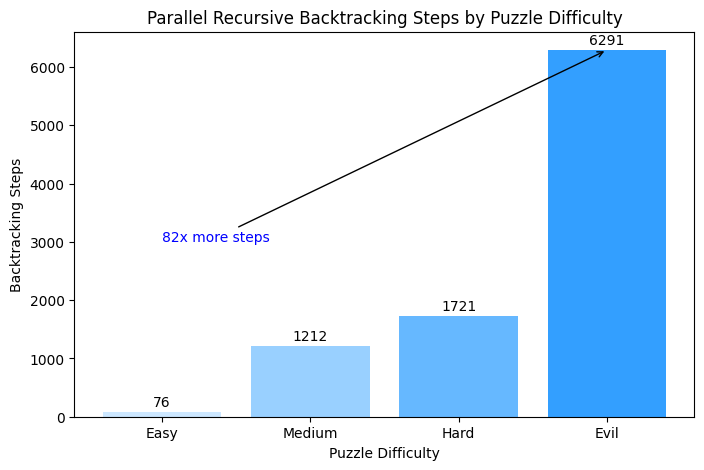

In [ ]:
import matplotlib.pyplot as plt

# Data for the chart
difficulties = ['Easy', 'Medium', 'Hard', 'Evil']
parallel_backtracking_steps = [76, 1212, 1721, 6291]

# Custom shades of blue
colors = ['#cce7ff', '#99d0ff', '#66b8ff', '#339fff']  # Lighter to darker blue gradient

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(difficulties, parallel_backtracking_steps, color=colors)
plt.xlabel('Puzzle Difficulty')
plt.ylabel('Backtracking Steps')
plt.title('Parallel Recursive Backtracking Steps by Puzzle Difficulty')

# Annotate for a key insight (e.g., Evil puzzle took significantly more steps than Easy)
plt.annotate(
    '82x more steps',
    xy=('Evil', 6291), xytext=('Easy', 3000),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10, color='blue'
)

# Add exact values on top of the bars
for i, v in enumerate(parallel_backtracking_steps):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10, color='black')

# Display the chart
plt.show()


# PARALLELIZED SOLUTION USING CONSTRAINT PROPOGATION AND BACKTRACKING:

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import copy

class SudokuSolver:
    def __init__(self, board):
        self.board = board
        self.backtracked = 0  # Counter for backtracks

    def is_valid(self, row, col, num):
        """Check if placing num at board[row][col] is valid."""
        # Check row and column
        for i in range(9):
            if self.board[row][i] == num or self.board[i][col] == num:
                return False

        # Check 3x3 subgrid
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(start_row, start_row + 3):
            for j in range(start_col, start_col + 3):
                if self.board[i][j] == num:
                    return False
        return True

    def find_candidates(self):
        """Generate candidates for each empty cell."""
        candidates = {}
        for row in range(9):
            for col in range(9):
                if self.board[row][col] == 0:
                    candidates[(row, col)] = {num for num in range(1, 10) if self.is_valid(row, col, num)}
        return candidates

    def propagate_constraints(self, candidates):
        """Propagate constraints to reduce candidates."""
        changed = True
        while changed:
            changed = False
            for (row, col), possible_nums in list(candidates.items()):
                if len(possible_nums) == 1:
                    # Only one candidate; place it on the board
                    num = possible_nums.pop()
                    self.board[row][col] = num
                    del candidates[(row, col)]
                    changed = True

                    # Update constraints
                    for i in range(9):
                        candidates.get((row, i), set()).discard(num)  # Row
                        candidates.get((i, col), set()).discard(num)  # Column
                    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
                    for i in range(start_row, start_row + 3):
                        for j in range(start_col, start_col + 3):
                            candidates.get((i, j), set()).discard(num)
        return candidates

    def solve_with_constraints(self):
        """Solve the Sudoku using constraint propagation and backtracking."""
        candidates = self.find_candidates()
        candidates = self.propagate_constraints(candidates)

        # If no candidates left, return solved board or continue backtracking
        if not candidates:
            return True  # Solved

        # Pick the cell with the fewest candidates
        (row, col), possible_nums = min(candidates.items(), key=lambda x: len(x[1]))

        for num in possible_nums:
            # Create a copy of the board and candidates for recursive solving
            new_board = copy.deepcopy(self.board)
            new_candidates = copy.deepcopy(candidates)
            new_board[row][col] = num
            new_solver = SudokuSolver(new_board)
            new_solver.backtracked = self.backtracked  # Carry over backtrack count

            # Update candidates and propagate constraints
            new_candidates = new_solver.propagate_constraints(new_candidates)
            if new_solver.solve_with_constraints():
                # Update current board and backtrack count from successful branch
                self.board = new_solver.board
                self.backtracked = new_solver.backtracked
                return True

            # Increment backtrack counter if solution failed
            self.backtracked += 1

        return False

if __name__ == "__main__":
    # Load Sudoku boards
    board1 = np.load('1_Easy.npy')
    board2 = np.load('2_Medium.npy')
    board3 = np.load('3_Hard.npy')
    board4 = np.load('4_Evil.npy')

    # Choose a board to solve
    board_name = {'Easy': board1, 'Medium': board2, 'Hard': board3, 'Evil': board4}
    board_difficulty = ['Easy', 'Medium', 'Hard', 'Evil']

    for item in board_difficulty:
        sudoku = Sudoku(board_name[item])
        solver = SudokuSolver(sudoku.board)
        if solver.solve_with_constraints():
            print("Solved Sudoku:")
            for row in solver.board:
                print(row)
            print(f"Backtracks: {solver.backtracked}")
        else:
            print("No solution found.")


Solved Sudoku:
[8 9 7 5 1 4 3 6 2]
[2 3 6 9 8 7 4 5 1]
[4 1 5 2 3 6 9 7 8]
[3 5 2 7 4 8 6 1 9]
[1 8 9 6 2 5 7 3 4]
[6 7 4 1 9 3 2 8 5]
[9 4 8 3 6 1 5 2 7]
[5 2 3 8 7 9 1 4 6]
[7 6 1 4 5 2 8 9 3]
Backtracks: 0
Solved Sudoku:
[7 2 1 5 8 9 3 6 4]
[5 4 9 7 6 3 8 1 2]
[3 8 6 1 2 4 7 9 5]
[2 5 8 3 1 6 4 7 9]
[1 3 4 8 9 7 5 2 6]
[9 6 7 2 4 5 1 3 8]
[6 9 3 4 5 1 2 8 7]
[8 7 5 6 3 2 9 4 1]
[4 1 2 9 7 8 6 5 3]
Backtracks: 3
Solved Sudoku:
[7 2 8 4 1 6 3 9 5]
[5 4 9 8 3 2 7 1 6]
[6 3 1 5 9 7 4 2 8]
[1 9 4 3 6 5 2 8 7]
[8 6 2 7 4 9 1 5 3]
[3 7 5 1 2 8 6 4 9]
[2 8 7 6 5 4 9 3 1]
[4 1 6 9 8 3 5 7 2]
[9 5 3 2 7 1 8 6 4]
Backtracks: 0
Solved Sudoku:
[4 7 9 8 5 3 1 6 2]
[6 1 8 9 2 7 4 3 5]
[3 5 2 1 4 6 7 9 8]
[7 9 3 4 8 5 6 2 1]
[8 6 1 2 7 9 3 5 4]
[5 2 4 6 3 1 9 8 7]
[2 4 7 3 9 8 5 1 6]
[9 8 6 5 1 4 2 7 3]
[1 3 5 7 6 2 8 4 9]
Backtracks: 4


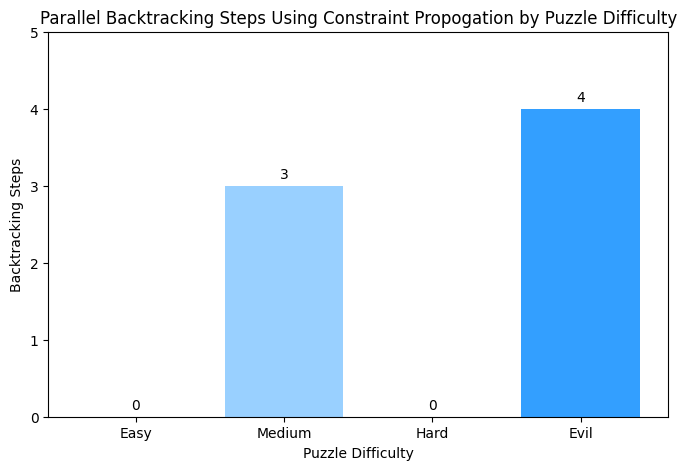

In [ ]:
import matplotlib.pyplot as plt

# Data for the chart
difficulties = ['Easy', 'Medium', 'Hard', 'Evil']
parallel_backtracking_steps = [0, 3, 0, 4]

# Custom shades of blue
colors = ['#cce7ff', '#99d0ff', '#66b8ff', '#339fff']  # Lighter to darker blue gradient

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(difficulties, parallel_backtracking_steps, color=colors)
plt.xlabel('Puzzle Difficulty')
plt.ylabel('Backtracking Steps')
plt.title('Parallel Backtracking Steps Using Constraint Propogation by Puzzle Difficulty')

# Adjust Y-axis limit for better proportions
plt.ylim(0, max(parallel_backtracking_steps) + 1)

# Add exact values on top of the bars
for i, v in enumerate(parallel_backtracking_steps):
    # Adjusting the text position to avoid overlap with the bars
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=10, color='black')

# Display the chart
plt.show()
